In [10]:
import paco.processing.paco as p
import paco.processing.fullpaco as f_paco
import paco.processing.fastpaco as fastPACO

from paco.util.util import *
import cv2 as cv2
from astropy.convolution import convolve, Gaussian2DKernel, AiryDisk2DKernel
from astropy.modeling.models import Gaussian2D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm 


This notebook will generate a series of image stacks with gaussian distributed noise backgrounds. Multiple MC trials are run to determine the distribution of the PACO outputs.

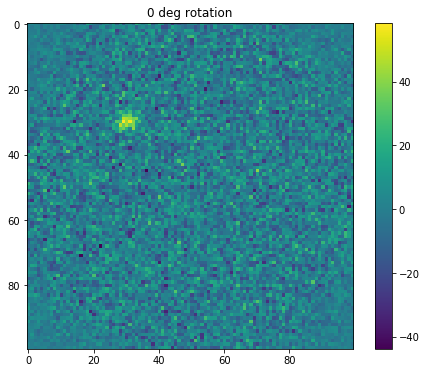

In [14]:
def GenerateImageStack(nFrames,angles,signalStrength,noiseLevel,dim = 100)   
    # Hardcoded source location
    p0 = (30,30)
    mean = 0

    images = [np.reshape(np.random.normal(mean, noiseLevel, dim**2), (dim,dim)) for j in range(nFrames)]
    X,Y = np.meshgrid(np.arange(-dim/2, di/2m),np.arange(-dim/2, dim))
    xx, yy = np.meshgrid(np.arange(-30, dim-30),np.arange(-30, dim-30))
    s = gaussian2d(xx,yy,signalStrength/np.sqrt(nFrames), 2)

    #images_signal = [i + s for i in images]
    rot_noise = np.array([rotateImage(images[j], angles[j]) for j in range(nFrames)])
    rot_sigs = np.array([rotateImage(s, angles[j]) for j in range(nFrames)])
    rot_images = np.array([rot_noise[j] + rot_sigs[j] for j in range(nFrames)])
    return rot_images

def GetImPatch(im,px,width):
        k = int(width/2)
        nx, ny = np.shape(im.shape)[:2]
        if px[0]+k > nx or px[0]-k < 0 or px[1]+k > ny or px[1]-k < 0:
            #print("pixel out of range")
            return None
        patch = im[i][int(px[0])-k:int(px[0])+k, int(px[1])-k:int(px[1])+k]
        return patch


In [ ]:
peaks = []
b_patch = []
a_patch = []
b_no_sig = []
a_no_sig = []

nTrials = 50
fp = fastPACO.fastPACO(patch_size = 49)

psig = (30,30)
poff = (70,70)
angles = np.linspace(0,angle,nFrames)
mask = createCircularMask(b[0].shape,radius = 4)


In [ ]:
for i in range(nTrials):
    im_stack = GenerateImageStack(100,angles,5.0,1.0)
    fp.set_image_sequence(im_stack)
    a,b = fp.PACO(angles,scale = 1, params={"sigma":2.0},model_name = gaussian_2d_model)
    peaks.append(np.max(b))
    b_patch.append(GetImPatch(b,psig))
    a_patch.append(GetImPatch(a,psig))
    b_no_sig.append(GetImPatch(b,poff))
    a_no_sig.append(GetImPatch(a,poff))

In [ ]:
print("Mean peak:",np.mean(np.array(peaks)))
print("Std peak:",np.std(np.array(peaks)))
print("Sig Counts:",np.sum(np.array(b_patch))[mask])
print("Mean Std:", 1.0/np.sqrt(np.mean(np.array([np.mean(ap) for ap in a_no_sig]))))

Precomputing Statistics...
PSF template shape (9, 9)
0.0%
10.0%
20.0%
30.0%
40.0%
50.0%
60.0%
70.0%
80.0%
90.0%
Running PACO...
0.0%
10.0%
20.0%
30.0%
40.0%


In [ ]:
plt.figure()
plt.hist(np.array([np.mean(bp) for bp in b_patch]),bins = 10)
plt.show()

In [ ]:
plt.figure()
plt.hist(np.array([np.mean(bp) for bp in b__no_sig]),bins = 10)
plt.show()

In [ ]:
plt.hist(np.array(peaks),bins = 10)
plt.show()